In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [2]:
df_us = pd.read_csv('us.csv')

In [3]:
df_us.set_index('date', inplace = True)



In [4]:
df_us.shape



(239, 2)

In [5]:
df_us.head()



,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

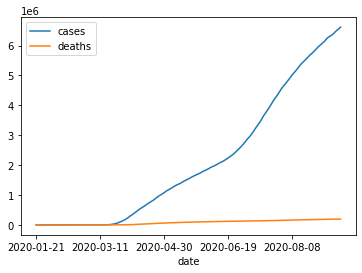

In [6]:
df_us.plot()



In [10]:
df_us['case_day'] = df_us['cases'].diff()
df_us['case_day'][0] = 1

In [12]:
df_us['case_day']


date
2020-01-21        1.0
2020-01-22        0.0
2020-01-23        0.0
2020-01-24        1.0
2020-01-25        1.0
               ...   
2020-09-11    47548.0
2020-09-12    39149.0
2020-09-13    33369.0
2020-09-14    36836.0
2020-09-15    39224.0
Name: case_day, Length: 239, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

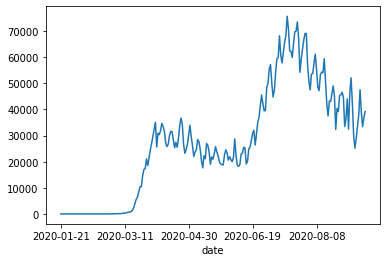

In [13]:
df_us['case_day'].plot()


In [15]:
test = adfuller(df_us['case_day'])
test_cases_day = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_day)
# P-value > 0.05 Not Stationary


Test Statstic                   -1.907827
p-value                          0.328388
#Lags Used                      15.000000
Number of Observations Used    223.000000
dtype: float64
